Path to dataset files: /kaggle/input/credit-card-transaction
Year                     0
Month                    0
Department               0
Division                 0
Merchant                 0
TranxDescription         0
TranxDate           324016
TrnxAmount               0
dtype: int64
                Year          Month                      TranxDate  \
count  464505.000000  464505.000000                         464505   
mean     2020.750388       5.938728  2020-09-11 00:43:59.031226624   
min      2019.000000       1.000000            2018-06-14 00:00:00   
25%      2019.000000       3.000000            2019-06-25 00:00:00   
50%      2021.000000       5.000000            2020-08-19 00:00:00   
75%      2022.000000       9.000000            2021-11-29 00:00:00   
max      2023.000000      12.000000            2023-01-27 00:00:00   
std         1.386728       3.406394                            NaN   

          TrnxAmount  
count  464505.000000  
mean      432.013689  
min    -86

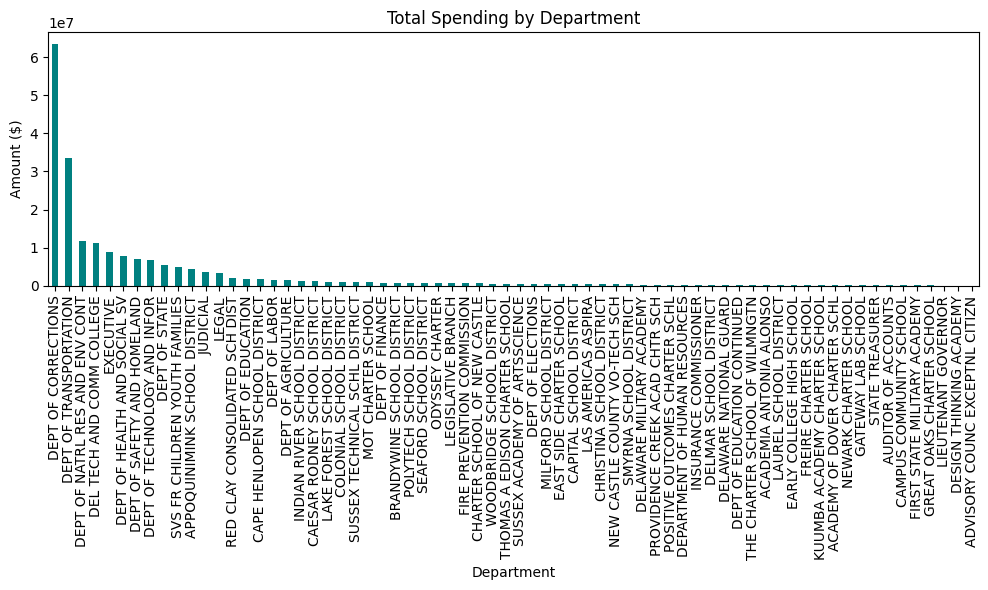

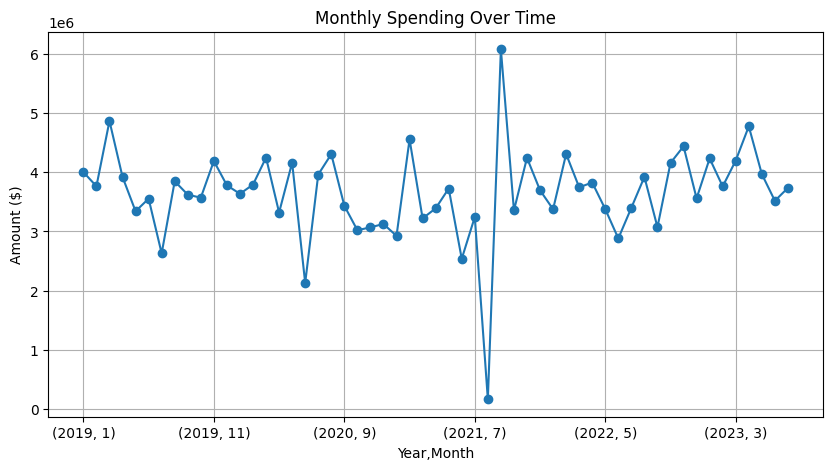

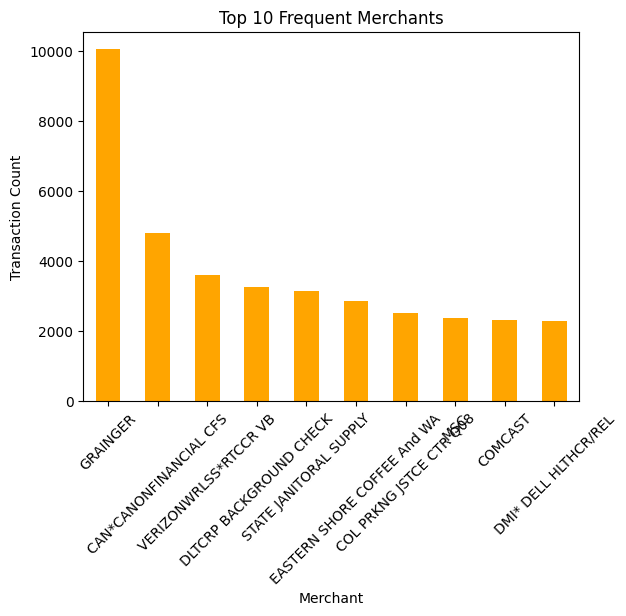

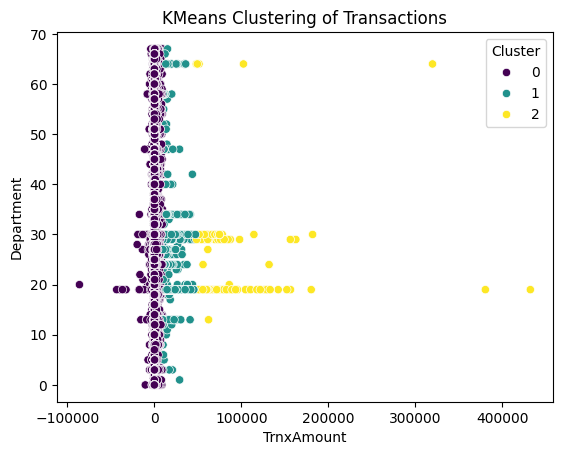

In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, RocCurveDisplay

import kagglehub



path = kagglehub.dataset_download("ybifoundation/credit-card-transaction")

print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/CreditCardTransaction.csv")
df.head()


df['TranxDate'] = pd.to_datetime(df['TranxDate'], errors='coerce')

print(df.isnull().sum())


df = df.dropna(subset=['TranxDate'])

print(df.describe())
print(df['Department'].value_counts())

dept_spend = df.groupby('Department')['TrnxAmount'].sum().sort_values(ascending=False)
dept_spend.plot(kind='bar', figsize=(10,6), color='teal')
plt.title("Total Spending by Department")
plt.ylabel("Amount ($)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

monthly_spend = df.groupby(['Year', 'Month'])['TrnxAmount'].sum()

monthly_spend.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Monthly Spending Over Time")
plt.ylabel("Amount ($)")
plt.grid(True)
plt.show()

top_merchants = df['Merchant'].value_counts().head(10)

top_merchants.plot(kind='bar', color='orange')
plt.title("Top 10 Frequent Merchants")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.show()

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

df_cluster = df[['TrnxAmount', 'Department']].copy()
le = LabelEncoder()
df_cluster['Department'] = le.fit_transform(df_cluster['Department'])


kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)


sns.scatterplot(x='TrnxAmount', y='Department', hue='Cluster', data=df_cluster, palette='viridis')
plt.title("KMeans Clustering of Transactions")
plt.show()

